In [20]:
import random
import os
import pathlib
import math


import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_addons as tfa

import train
import config
from model import losses
from train import mkds, compile_model
from dataset_utils import preprocess, auguments

In [3]:
ds_root = pathlib.Path('/mass_roads/test/')
pathlist = ds_root.glob("map/*.png")
pathlist = sorted([path.name for path in pathlist])
sat_pathlist = sorted([str(ds_root / "sat" / path) for path in pathlist])
map_pathlist = sorted([str(ds_root / "map" / path) for path in pathlist])
test_ds = mkds(sat_pathlist, map_pathlist, batch_size=config.BATCH_SIZE, test=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


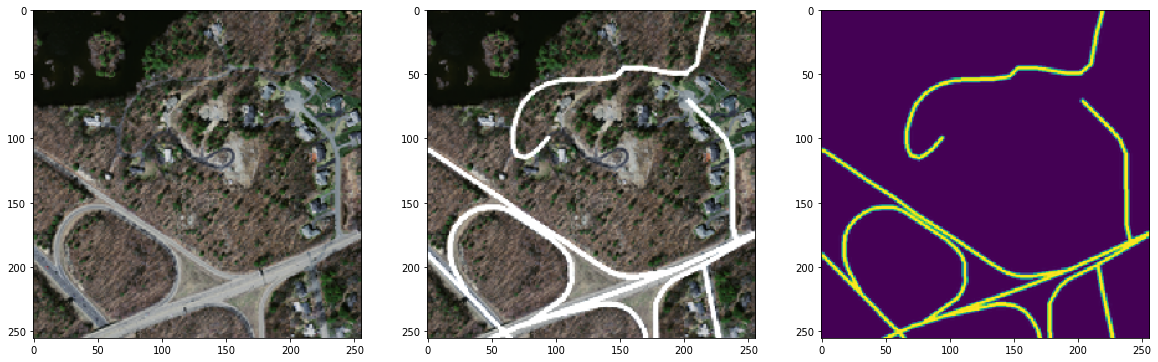

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


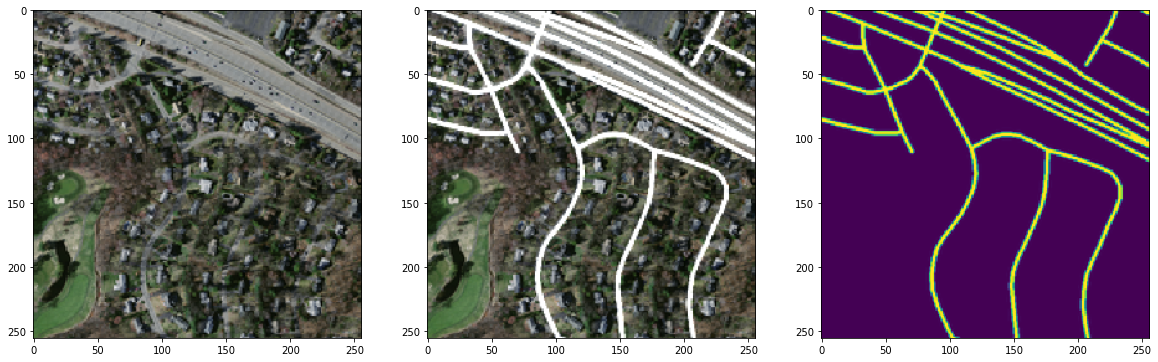

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


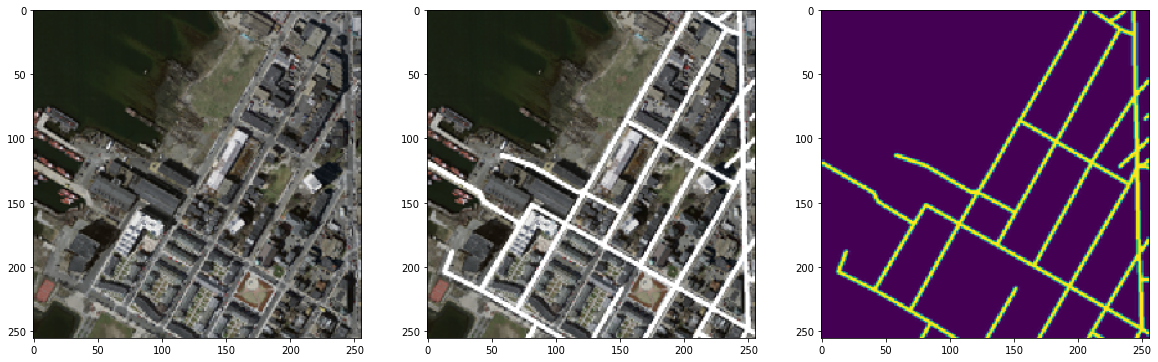

In [35]:
for i, t in test_ds.shuffle(100).take(3):
    idx = 3
    plt.figure(figsize=(20,20))
    plt.subplot(1,3,1)
    plt.imshow(i[idx])
    plt.subplot(1,3,2)
    plt.imshow(t[idx]+i[idx])
    plt.subplot(1,3,3)
    plt.imshow(t[idx][..., 0])
    plt.show()

In [21]:
ds_root = pathlib.Path('/mass_roads/train/')
pathlist = ds_root.glob("map/*.png")
pathlist = sorted([path.name for path in pathlist])
sat_pathlist = sorted([str(ds_root / "sat" / path) for path in pathlist])
map_pathlist = sorted([str(ds_root / "map" / path) for path in pathlist])
train_ds = mkds(sat_pathlist, map_pathlist, batch_size=config.BATCH_SIZE, test=True)

In [21]:
train_ds = train_ds.map(
    auguments.Augment(zoom=False, flip=True, rotate=True),
    num_parallel_calls=tf.data.AUTOTUNE,
)

In [28]:
loss = losses.DICELoss()
model = compile_model(loss)

date = '211213'
name = 'DA_RF-DICE-E50'
weights_path = f'/results/{date}/checkpoints/{name}/{name}'
_ = model.load_weights(weights_path)

print(name)
steps_per_epoch = math.ceil(len(pathlist) / config.BATCH_SIZE)
tr_loss, tr_iou = model.evaluate(train_ds)
print("tr loss: ", tr_loss)
print("tr  iou: ", tr_iou)

va_loss, va_iou = model.evaluate(test_ds)
print("va loss: ", va_loss)
print("va  iou: ", va_iou)

DA_RF-DICE-E50
134/134 [==============================] - 22s 151ms/step - loss: 0.3830 - mean_io_u_8: 0.5266
tr loss:  0.38301506638526917
tr  iou:  0.5265763401985168
7/7 [==============================] - 1s 152ms/step - loss: 0.3026 - mean_io_u_8: 0.6522
va loss:  0.30262672901153564
va  iou:  0.6521896123886108


In [29]:
loss = losses.DICELoss()
model = compile_model(loss)

date = '211213'
name = 'NDA-DICE-E50'
weights_path = f'/results/{date}/checkpoints/{name}/{name}'
_ = model.load_weights(weights_path)

print(name)
steps_per_epoch = math.ceil(len(pathlist) / config.BATCH_SIZE)
tr_loss, tr_iou = model.evaluate(train_ds)
print("tr loss: ", tr_loss)
print("tr  iou: ", tr_iou)

va_loss, va_iou = model.evaluate(test_ds)
print("va loss: ", va_loss)
print("va  iou: ", va_iou)

NDA-DICE-E50
134/134 [==============================] - 22s 153ms/step - loss: 0.4892 - mean_io_u_9: 0.5321
tr loss:  0.4892093539237976
tr  iou:  0.5321066975593567
7/7 [==============================] - 1s 161ms/step - loss: 0.3432 - mean_io_u_9: 0.6536
va loss:  0.3432309329509735
va  iou:  0.6536400318145752


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


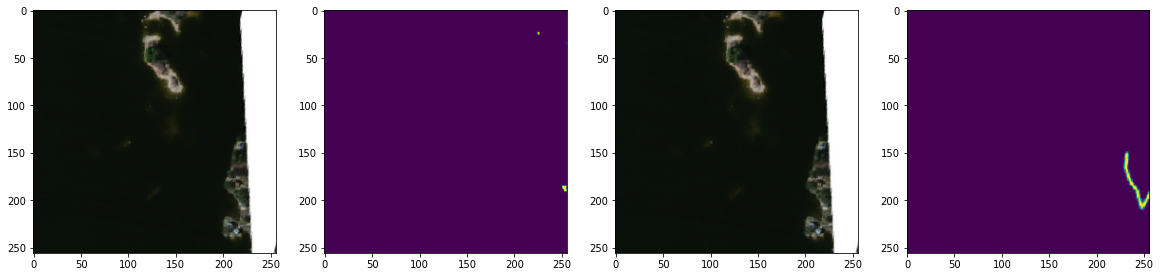

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


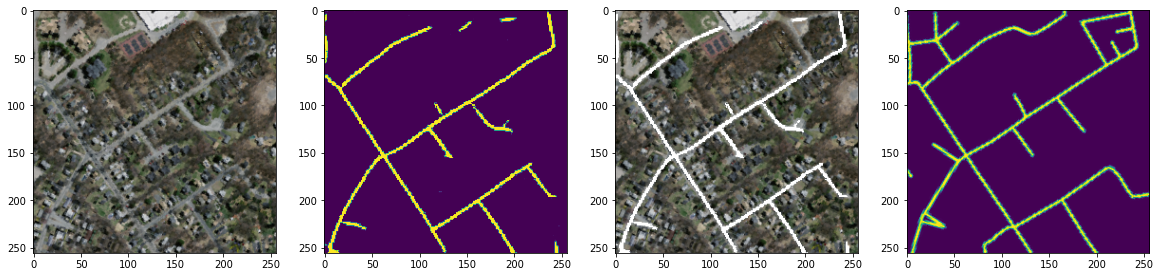

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


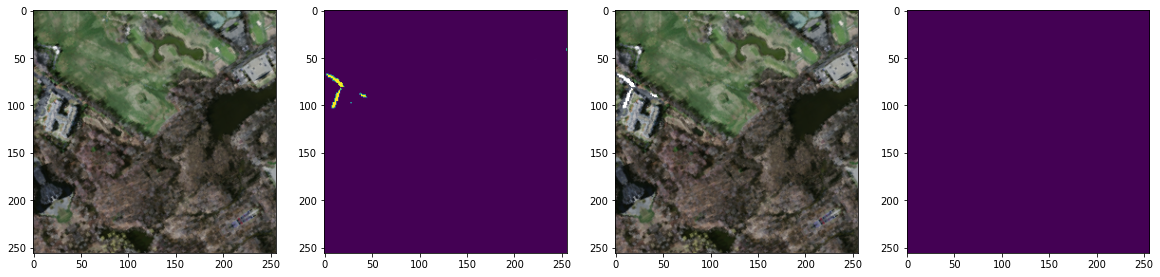

In [38]:
date = '211213'
name = 'NDA-DICE-E50'
weights_path = f'/results/{date}/checkpoints/{name}/{name}'
_ = model.load_weights(weights_path)


for i, t in train_ds.take(3):
    idx = 33
    plt.figure(figsize=(20,20))
    pred = model.predict(i)
    plt.subplot(1,4,1)
    plt.imshow(i[idx])
    plt.subplot(1,4,2)
    plt.imshow(pred[idx][...,0])
    plt.subplot(1,4,3)
    plt.imshow(i[idx]+pred[idx])
    plt.subplot(1,4,4)
    plt.imshow(t[idx][..., 0])
    plt.show()

In [7]:
loss = losses.DICELoss()
model = compile_model(loss)

date = '211213'
name = 'DA_RF-DICE-E50'
weights_path = f'/results/{date}/checkpoints/{name}/{name}'
_ = model.load_weights(weights_path)

print(name)
tr_loss, tr_iou = model.evaluate(train_ds)
print("tr loss: ", tr_loss)
print("tr  iou: ", tr_iou)

va_loss, va_iou = model.evaluate(test_ds)
print("va loss: ", va_loss)
print("va  iou: ", va_iou)

DA_RF-DICE-E50
134/134 [==============================] - 21s 156ms/step - loss: 0.3239 - mean_io_u_1: 0.6470
tr loss:  0.3239303529262543
tr  iou:  0.6469709277153015
7/7 [==============================] - 1s 150ms/step - loss: 0.3026 - mean_io_u_1: 0.6522
va loss:  0.30262672901153564
va  iou:  0.6521896123886108


In [ ]:
print('DA未適用')
loss = losses.DICELoss()
model = compile_model(loss)
name = 'DA-DICE-E50-ds0.25'
weights_path = f'/results/211210/checkpoints/{name}/{name}'
model.load_weights(weights_path)

tr_loss, tr_iou = model.evaluate(train_ds)
print("tr loss: ", tr_loss)
print("tr  iou: ", tr_iou)

va_loss, va_iou = model.evaluate(test_ds)
print("va loss: ", va_loss)
print("va  iou: ", va_iou)